<a href="https://colab.research.google.com/github/Juancarlos56/Repositorio-Simulacion-10/blob/main/TareasEnClases/Tarea6__ForestFiresData_PruebasAleatoridad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabajo realizado por: 

Juan Carlos Barrera Barrera 

### Descripción de Tarea 1

Dado el conjunto de datos Forest-Fires-Data
(AVAC), realice el cálculo de la covarianza
empleando Excel o Python. Deberá considerar las
variables: viento (wind) y humedad relativa (rH).
La descripción del archivo se encuentra en:
Forest-Fires-Description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/TrabajosSimulacion/Tarea6_ ForestFiresData-PruebasAleatoridad
!ls

/content/drive/My Drive/Colab Notebooks/TrabajosSimulacion/Tarea6_ ForestFiresData-PruebasAleatoridad
 forestfires.csv  'Tarea6_ ForestFiresData-PruebasAleatoridad.ipynb'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go

In [ ]:
datasetCompleto = pd.read_csv('forestfires.csv', low_memory=False, sep=',')
datasetCompleto.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Diagrama de dispersión

Dada una muestra (x1,y1),(x2,y2),...,(xn,yn) en la que se miden las variables X e Y para cada elemento, podríamos graficar estos pares de puntos en un eje cartesiano.

Y ahora vamos a graficar el diagrama de dispersión entre viento (wind) y humedad relativa (rH) utilizando la función geom_point de plotnine

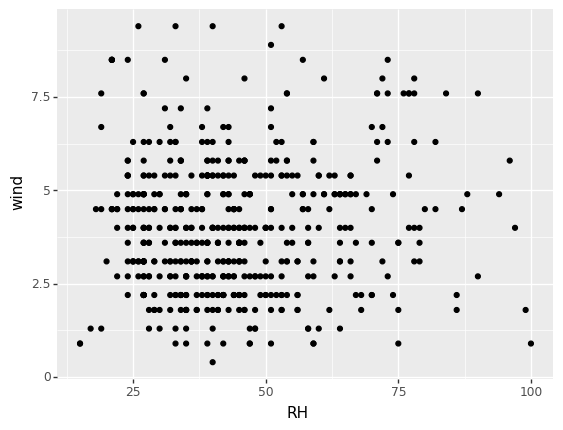

<ggplot: (8773684709565)>

In [ ]:
from plotnine import *

(ggplot(datasetCompleto, aes(x = "RH", y = "wind")) + 
geom_point())

### Covarianza

La estadística no sólo sirve para entender cada variable por separado, sino que también podemos entender las relaciones entre dos o más variables, gráficamente y a través de estadísticos. En este caso vamos a hablar acerca de las relaciones entre dos variables cuantitativas utilizando la Covarianza.

Formula: 

$$ S_{XY} = \frac{\sum_{i=1}^{n}(x_i-\bar{X})(y_i-\bar{Y})}{n-1} $$

Con este metodo estadístico medimos el signo de la relación lineal entre X e Y:

- Si SXY=0 entonces no existe relación lineal entre X e Y
- Si SXY>0 entonces existe una relación lineal directa o positiva entre X e Y. Esto es, a mayores valores de X, en promedio tenemos mayores valores de Y y viceversa.
- Si SXY < 0 entonces existe una relación lineal inversa o negativa entre X e Y. Esto es, a mayores valores de X, en promedio tenemos menores valores de Y y viceversa.

#### Covarianza de todo el dataset con todas las variables

In [ ]:
cov_mat = datasetCompleto.cov()
cov_mat

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,5.353568,1.535401,-0.268720,-7.170019,-49.313282,0.065512,-0.688667,3.217602,0.077926,0.044776,9.335731
Y,1.535401,1.512655,-0.314391,0.612960,-30.869004,-0.137321,-0.172134,1.248699,-0.044822,0.012097,3.513139
FFMC,-0.268720,-0.314391,30.471624,135.272459,452.587277,13.384902,13.831997,-27.111933,-0.281718,0.092635,14.098358
DMC,-7.170019,0.612960,135.272459,4101.951889,10838.501342,89.102965,174.639099,77.121359,-12.087923,1.417655,297.592727
DC,-49.313282,-30.869004,452.587277,10838.501342,61536.835467,259.185313,714.751694,-158.640438,-90.430008,2.632813,779.803423
ISI,0.065512,-0.137321,13.384902,89.102965,259.185313,20.788832,10.438820,-9.859163,0.872661,0.091313,2.396689
temp,-0.688667,-0.172134,13.831997,174.639099,714.751694,10.438820,33.716898,-49.969934,-2.362793,0.119421,36.165676
RH,3.217602,1.248699,-27.111933,77.121359,-158.640438,-9.859163,-49.969934,266.259802,2.029220,0.481729,-78.441272
wind,0.077926,-0.044822,-0.281718,-12.087923,-90.430008,0.872661,-2.362793,2.029220,3.210019,0.032409,1.404775
rain,0.044776,0.012097,0.092635,1.417655,2.632813,0.091313,0.119421,0.481729,0.032409,0.087592,-0.138767


#### Obtención de covarianza para nuestras variables de interes

In [ ]:
cov_mat.loc["RH", "wind"]

2.0292197082152543

Si SXY>0 entonces existe una relación lineal directa o positiva entre X e Y. Esto es, a mayores valores de X, en promedio tenemos mayores valores de Y y viceversa.

### Conclusión 

Luego de haber obtenido el valor y graficar el
diagrama de dispersión. Se concluye mediante el grafico de dispersión se tiene que existe una relacion debil/nula entre las variables de humedad relativa y viento, esto tambien se demuestra al momento que obtenemos la covariaza, tenemos que el valor es positivo por lo tanto tenemos una relacion positiva, pero el valor sigue siendo muy pequeño para decir que existe una relacion fuerte entre estas dos variables. 




### Descripción tarea 2

Dado el conjunto de datos Forest-Fires-Data
(AVAC), realice el cálculo del coeficiente de
correllación lineal de Pearson empleando Excel o
Python. Deberá considerar las variables: viento
(wind) y humedad relativa (rH). 



Aunque la covarianza nos da el signo de la relación entre dos variables, al depender de las unidades de X y de Y, no sabemos si un valor es alto o bajo; sólo sabemos el signo. Para solucionar esto, estandarizamos los valores.

$$r_{XY} = \frac{S_{XY}}{S_X S_Y}$$

In [ ]:
corr_mat = datasetCompleto.corr()
corr_mat

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


#### Obtención de correlación para nuestras variables de interes

In [ ]:
from scipy.stats import pearsonr
corr_test = pearsonr(x = datasetCompleto['RH'], y =  datasetCompleto['wind'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])

Coeficiente de correlación de Pearson:  0.06941006715607248


In [ ]:
print("Coeficiente de correlación de Person: ", corr_mat.loc["RH", "wind"])

Coeficiente de correlación de Person:  0.06941006715607258


#### Regresión lineal 

##### Sklearn

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datasetCompleto[['RH']]
y = datasetCompleto['wind']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [3.72232715]
Coeficiente: [('RH', 0.00841230803484513)]
Coeficiente de determinación R^2: 0.002901193536960389


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[3.94104716]
 [4.05040717]
 [4.10929332]]

El error (rmse) de test es: 1.6350160179123725


##### Statsmodels

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datasetCompleto[['RH']]
y = datasetCompleto['wind']
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.384
Date:                Fri, 20 May 2022   Prob (F-statistic):              0.123
Time:                        22:17:10   Log-Likelihood:                -834.17
No. Observations:                 413   AIC:                             1672.
Df Residuals:                     411   BIC:                             1680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7223      0.258     14.445      0.0

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[ 3.21578257e+00,  4.22887173e+00],
       [-2.29802016e-03,  1.91226362e-02]])

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.243890,0.131801,3.984802,4.502979,0.640967,7.846813
1,3.991521,0.112238,3.770889,4.212153,0.391159,7.591883
2,4.067232,0.091755,3.886864,4.247600,0.469113,7.665351
3,4.185004,0.107136,3.974401,4.395607,0.585243,7.784765


Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

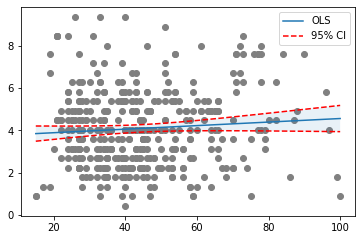

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1.6350160179123718


### Conclusión

Como conclusión tanto mediante la grafica y el valor de correlacion tenemos como resultado una correlacion positiva debil tendiendo mas a no tener ninguna correlacion esto debido a que tenemos un valor de 0.06 que es muy bajo entre las dos variables. 

Por lo que dentro de la regresión se puede ver tambien no se ajusta de la mejor manera a los datos. 
